Cuál es el canal más exitoso de toda la historia de Youtube

Leemos nuestra base de datos

In [2]:
import pandas as pd

In [19]:
youtube_channels_dataset = pd.read_csv("./youtube_channels_data.csv",skipinitialspace=True)

youtube_channels_dataset.head()

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013


Añadiremos una columna con los años que lleva activo el canal para calcular su crecimiento anual

In [88]:
# renombramos las cabeceras para eliminar espacios
youtube_channels_dataset.rename(columns = {
  'rank ':'rank',
  'subscribers ':'subscribers',
  'video views ': 'video_views',
  'video count ': 'video_count',
  'category ': 'category',
  'started ': 'started'
}, inplace = True)


In [89]:
# IMPORTANTE, las cabeceras tienen espacios al final
youtube_channels_started_dataset = youtube_channels_dataset["started"]

In [ ]:
youtube_time_active = []
for date in youtube_channels_started_dataset:
  youtube_time_active.append(2022 - int(date))

youtube_channels_dataset.insert(5, "time_active", youtube_time_active)

Añadiremos otra celda para calcular su crecimiento anual

In [91]:
youtube_channels_factors = youtube_channels_dataset.filter(["subscribers", "time_active", "video_views"])
youtube_channels_factors

,subscribers,time_active,video_views
1,150000000,7,"167,122,746,349"
12,80900000,4,"62,444,514,631"
9,91000000,6,"74,204,846,514"
7,93800000,7,"73,296,417,664"
0,213000000,16,"188,073,919,029"
4,116000000,9,"78,437,871,689"
13,76300000,6,"23,174,639,387"
15,73600000,6,"23,351,994,944"
11,83300000,8,"46,291,230,294"
8,92100000,9,"71,692,471,446"


In [ ]:
youtube_channels_annual_growth = []

for date in youtube_channels_factors.index:
  youtube_channels_annual_growth.append(youtube_channels_factors["subscribers"][date] / youtube_channels_factors["time_active"][date])

youtube_channels_dataset.insert(7, "subscribers/time_activate", youtube_channels_annual_growth)

<AxesSubplot:xlabel='youtuber'>

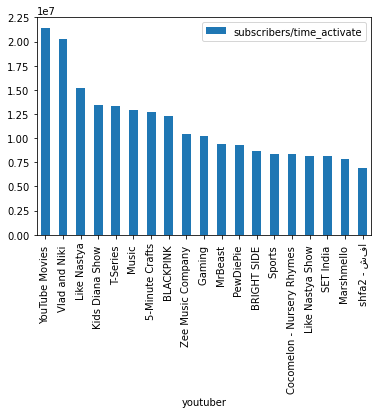

In [100]:
youtube_channels_dataset.sort_values(by="subscribers/time_activate", ascending=False)[0:19].plot(kind="bar", x="youtuber", y="subscribers/time_activate")

Canales con el mayor numero de suscriptores

<AxesSubplot:xlabel='youtuber'>

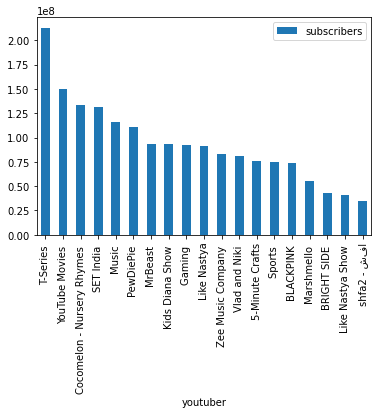

In [103]:
youtube_channels_dataset.sort_values(by="subscribers", ascending=False)[0:19].plot(kind="bar", x="youtuber", y="subscribers")